### ***MACHINE LEARNING PROJECT LIFE CYCLE***

1. *Define Problem*
2. *Data Collection*
3. *Model Exploration*
4. *Model Refinement*
5. *Test & Evaluation*
6. *Deployment*
7. *Model Maintenance*

#### ***PROBLEM STATEMENT***
*Build a Model to Predict Employee Retention. (Expectation -- REST API)*

### ***Exploratory Data Analysis***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# creating a dataframe
data = pd.read_csv('/content/employee_attrition.csv')
data.head()

,EmployeeID,SatisfactionLevel,LastEvaluation,ProjectCount,AverageMonthlyHours,TimeSpent,WorkAccident,PromotionLast_5Years,Salary,Left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [3]:
# information about our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeID            14999 non-null  int64  
 1   SatisfactionLevel     14997 non-null  float64
 2   LastEvaluation        14999 non-null  float64
 3   ProjectCount          14999 non-null  int64  
 4   AverageMonthlyHours   14999 non-null  int64  
 5   TimeSpent             14999 non-null  int64  
 6   WorkAccident          14999 non-null  int64  
 7   PromotionLast_5Years  14999 non-null  int64  
 8   Salary                14999 non-null  object 
 9   Left                  14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [4]:
# dimensions of our data
data.shape

(14999, 10)

In [5]:
# descriptive statistics summary of our data
data.describe()

,EmployeeID,SatisfactionLevel,LastEvaluation,ProjectCount,AverageMonthlyHours,TimeSpent,WorkAccident,PromotionLast_5Years,Left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# unique values of a column
data['WorkAccident'].unique()

array([0, 1])

In [7]:
# unique values of a column
data['PromotionLast_5Years'].unique()

array([0, 1])

<Axes: xlabel='Left', ylabel='count'>

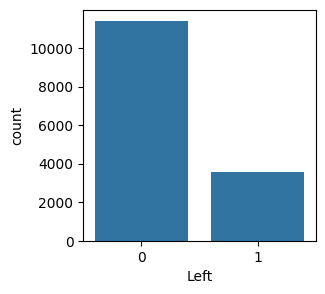

In [8]:
# check total employee range based on target column - Left
plt.figure(figsize=(3,3))
sns.countplot(x = 'Left', data = data)

***Observation***: *The count of people who left the organization is less.*

<Axes: xlabel='Salary', ylabel='count'>

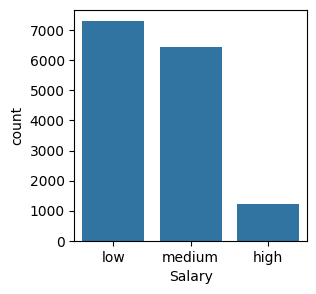

In [9]:
# feature -- 'Salary'
plt.figure(figsize=(3,3))
sns.countplot(x = 'Salary', data = data)

***Observation***: *Low salaried employee count is high.*

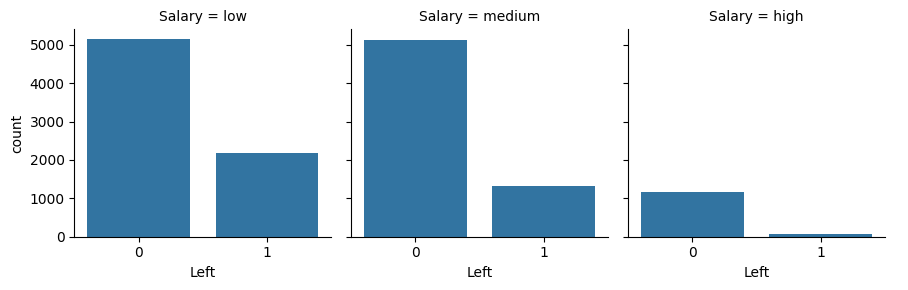

In [10]:
# 'Left' vs 'Salary'
sns.catplot(x = 'Left', kind = 'count', col = 'Salary', data = data, height = 3, aspect = 1)
plt.show()

***Observation***: *Low salaried employees left the organization.*

<Axes: xlabel='PromotionLast_5Years', ylabel='count'>

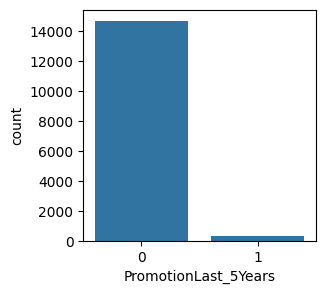

In [11]:
# feature -- 'PromotionLast_5Years'
plt.figure(figsize=(3,3))
sns.countplot(x = 'PromotionLast_5Years', data = data)

***Observation***: *Non promoted employee count is high.*

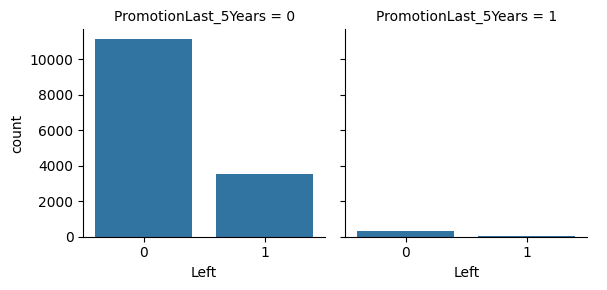

In [12]:
# 'Left' vs 'PromotionLast_5Years'
sns.catplot(x = 'Left', col = 'PromotionLast_5Years', data = data, kind = 'count', height = 3)

***Observation***: *Non promoted employees are leaving the organization.*

<Axes: xlabel='WorkAccident', ylabel='count'>

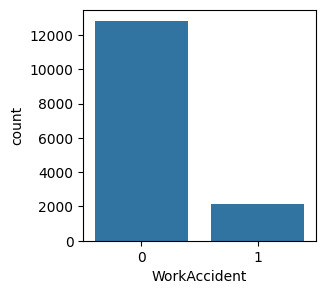

In [13]:
# feature -- 'WorkAccident'
plt.figure(figsize=(3,3))
sns.countplot(x = 'WorkAccident', data = data)

***Observation***: *People with work accident are less.*

<ipython-input-14-979c18c5e013>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SatisfactionLevel'])


<Axes: xlabel='SatisfactionLevel', ylabel='Density'>

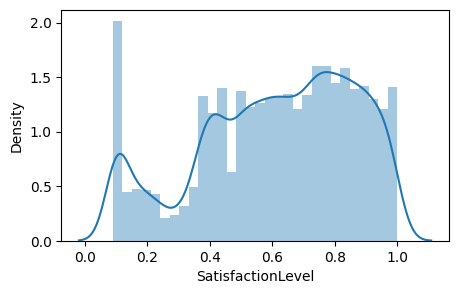

In [14]:
# univariate distribution of 'SatisfactionLevel'
plt.figure(figsize=(5,3))
sns.distplot(data['SatisfactionLevel'])

***Observation***: *SatisfactionLevel is distributed over 0 to 1 and has high count at 0.1.*

<Axes: xlabel='Left', ylabel='SatisfactionLevel'>

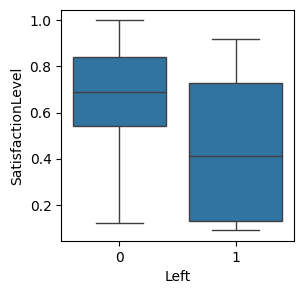

In [15]:
# distributions with respect to categories
plt.figure(figsize=(3,3))
sns.boxplot(x = 'Left', y = 'SatisfactionLevel', data = data)

***Observation***: *Employees with less satisfaction level mostly left the organization.*

<ipython-input-16-ad8a1a99ca4b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ProjectCount'])


<Axes: xlabel='ProjectCount', ylabel='Density'>

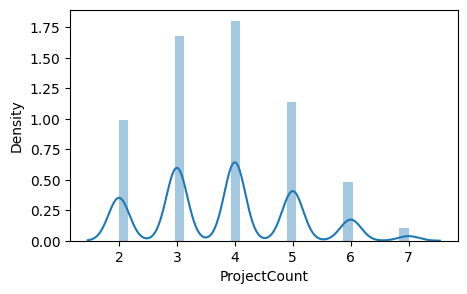

In [16]:
# univariate distribution of 'ProjectCount'
plt.figure(figsize=(5,3))
sns.distplot(data['ProjectCount'])

***Observation***: *The highest project count is 4.*

<Axes: xlabel='Left', ylabel='ProjectCount'>

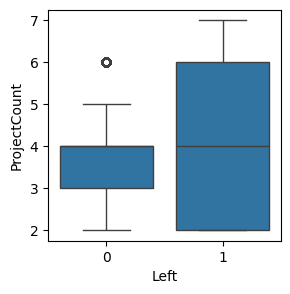

In [17]:
# distributions with respect to categories
plt.figure(figsize=(3,3))
sns.boxplot(x = 'Left', y = 'ProjectCount', data = data)

***Observation***: *Employee left when ProjectCount is high and reatined when ProjectCount is between 3 - 4.*

<ipython-input-18-03b7edec685f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LastEvaluation'])


<Axes: xlabel='LastEvaluation', ylabel='Density'>

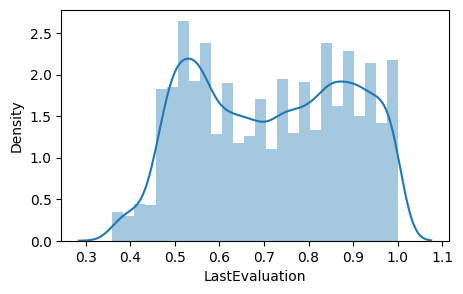

In [18]:
# univariate distribution of 'LastEvaluation'
plt.figure(figsize=(5,3))
sns.distplot(data['LastEvaluation'])

***Observation***: *LastEvaluation is distributed from 0.35 to 1 but it has high count at around 0.55.*

<Axes: xlabel='Left', ylabel='LastEvaluation'>

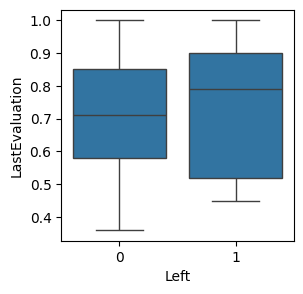

In [19]:
# distributions with respect to categories
plt.figure(figsize=(3,3))
sns.boxplot(x = 'Left', y = 'LastEvaluation', data = data)

***Observation***: *Employee with high LastEvaluation value has left.*

<ipython-input-20-74827220de89>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AverageMonthlyHours'])


<Axes: xlabel='AverageMonthlyHours', ylabel='Density'>

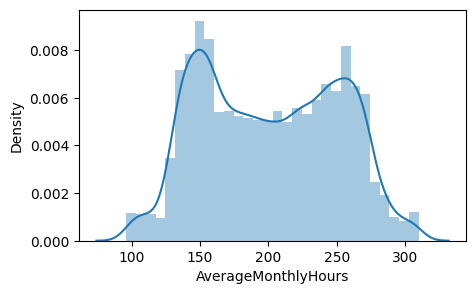

In [20]:
# univariate distribution of 'AverageMonthlyHours'
plt.figure(figsize=(5,3))
sns.distplot(data['AverageMonthlyHours'])

***Observation***: *Highest AverageMonthlyHours is at around 150.*

<Axes: xlabel='Left', ylabel='AverageMonthlyHours'>

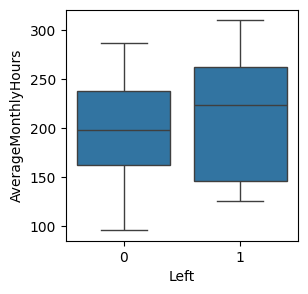

In [21]:
# distributions with respect to categories
plt.figure(figsize=(3,3))
sns.boxplot(x = 'Left', y = 'AverageMonthlyHours', data = data)

***Observation***: *Employee with highest AverageMonthlyHours left.*

<ipython-input-22-91b1b77dd336>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TimeSpent'])


<Axes: xlabel='TimeSpent', ylabel='Density'>

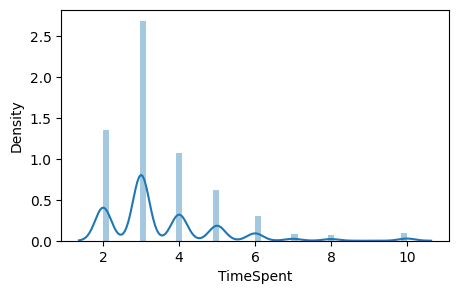

In [22]:
# univariate distribution of 'TimeSpent'
plt.figure(figsize=(5,3))
sns.distplot(data['TimeSpent'])

***Observation***: *TimeSpent by employee is distributed from 2 to 10 where it has high count at around 3 and low count at 9.*

<Axes: xlabel='Left', ylabel='TimeSpent'>

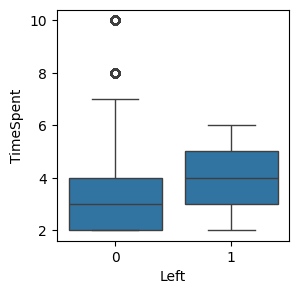

In [23]:
# distributions with respect to categories
plt.figure(figsize=(3,3))
sns.boxplot(x = 'Left', y = 'TimeSpent', data = data)

***Observation***: *Employee who spent more time has left the company.*

<ipython-input-24-67cb86065ed1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

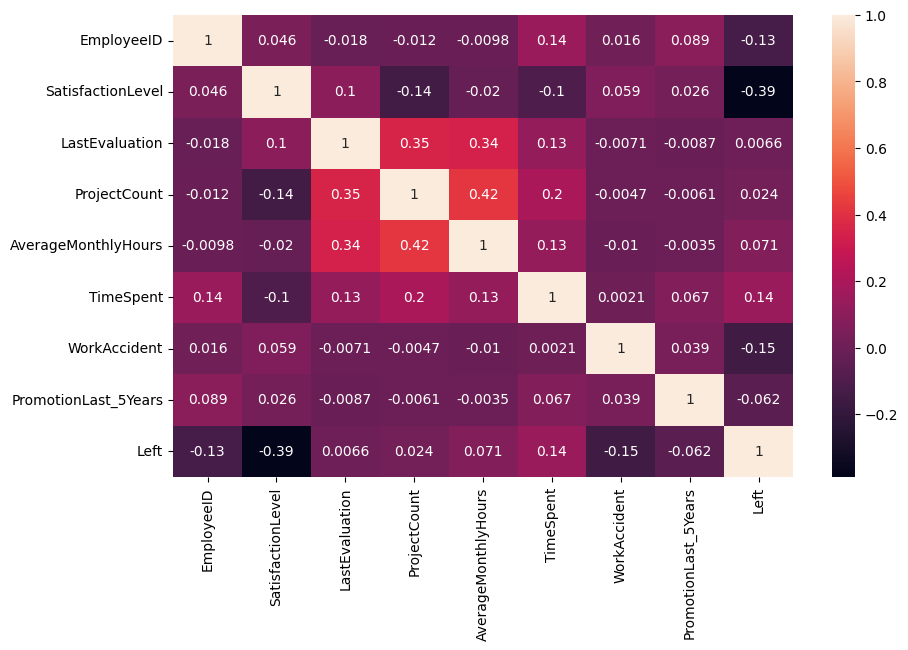

In [24]:
# checking correlation
correlation = data.corr()
fig = plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot = True)

<Figure size 1000x1000 with 0 Axes>

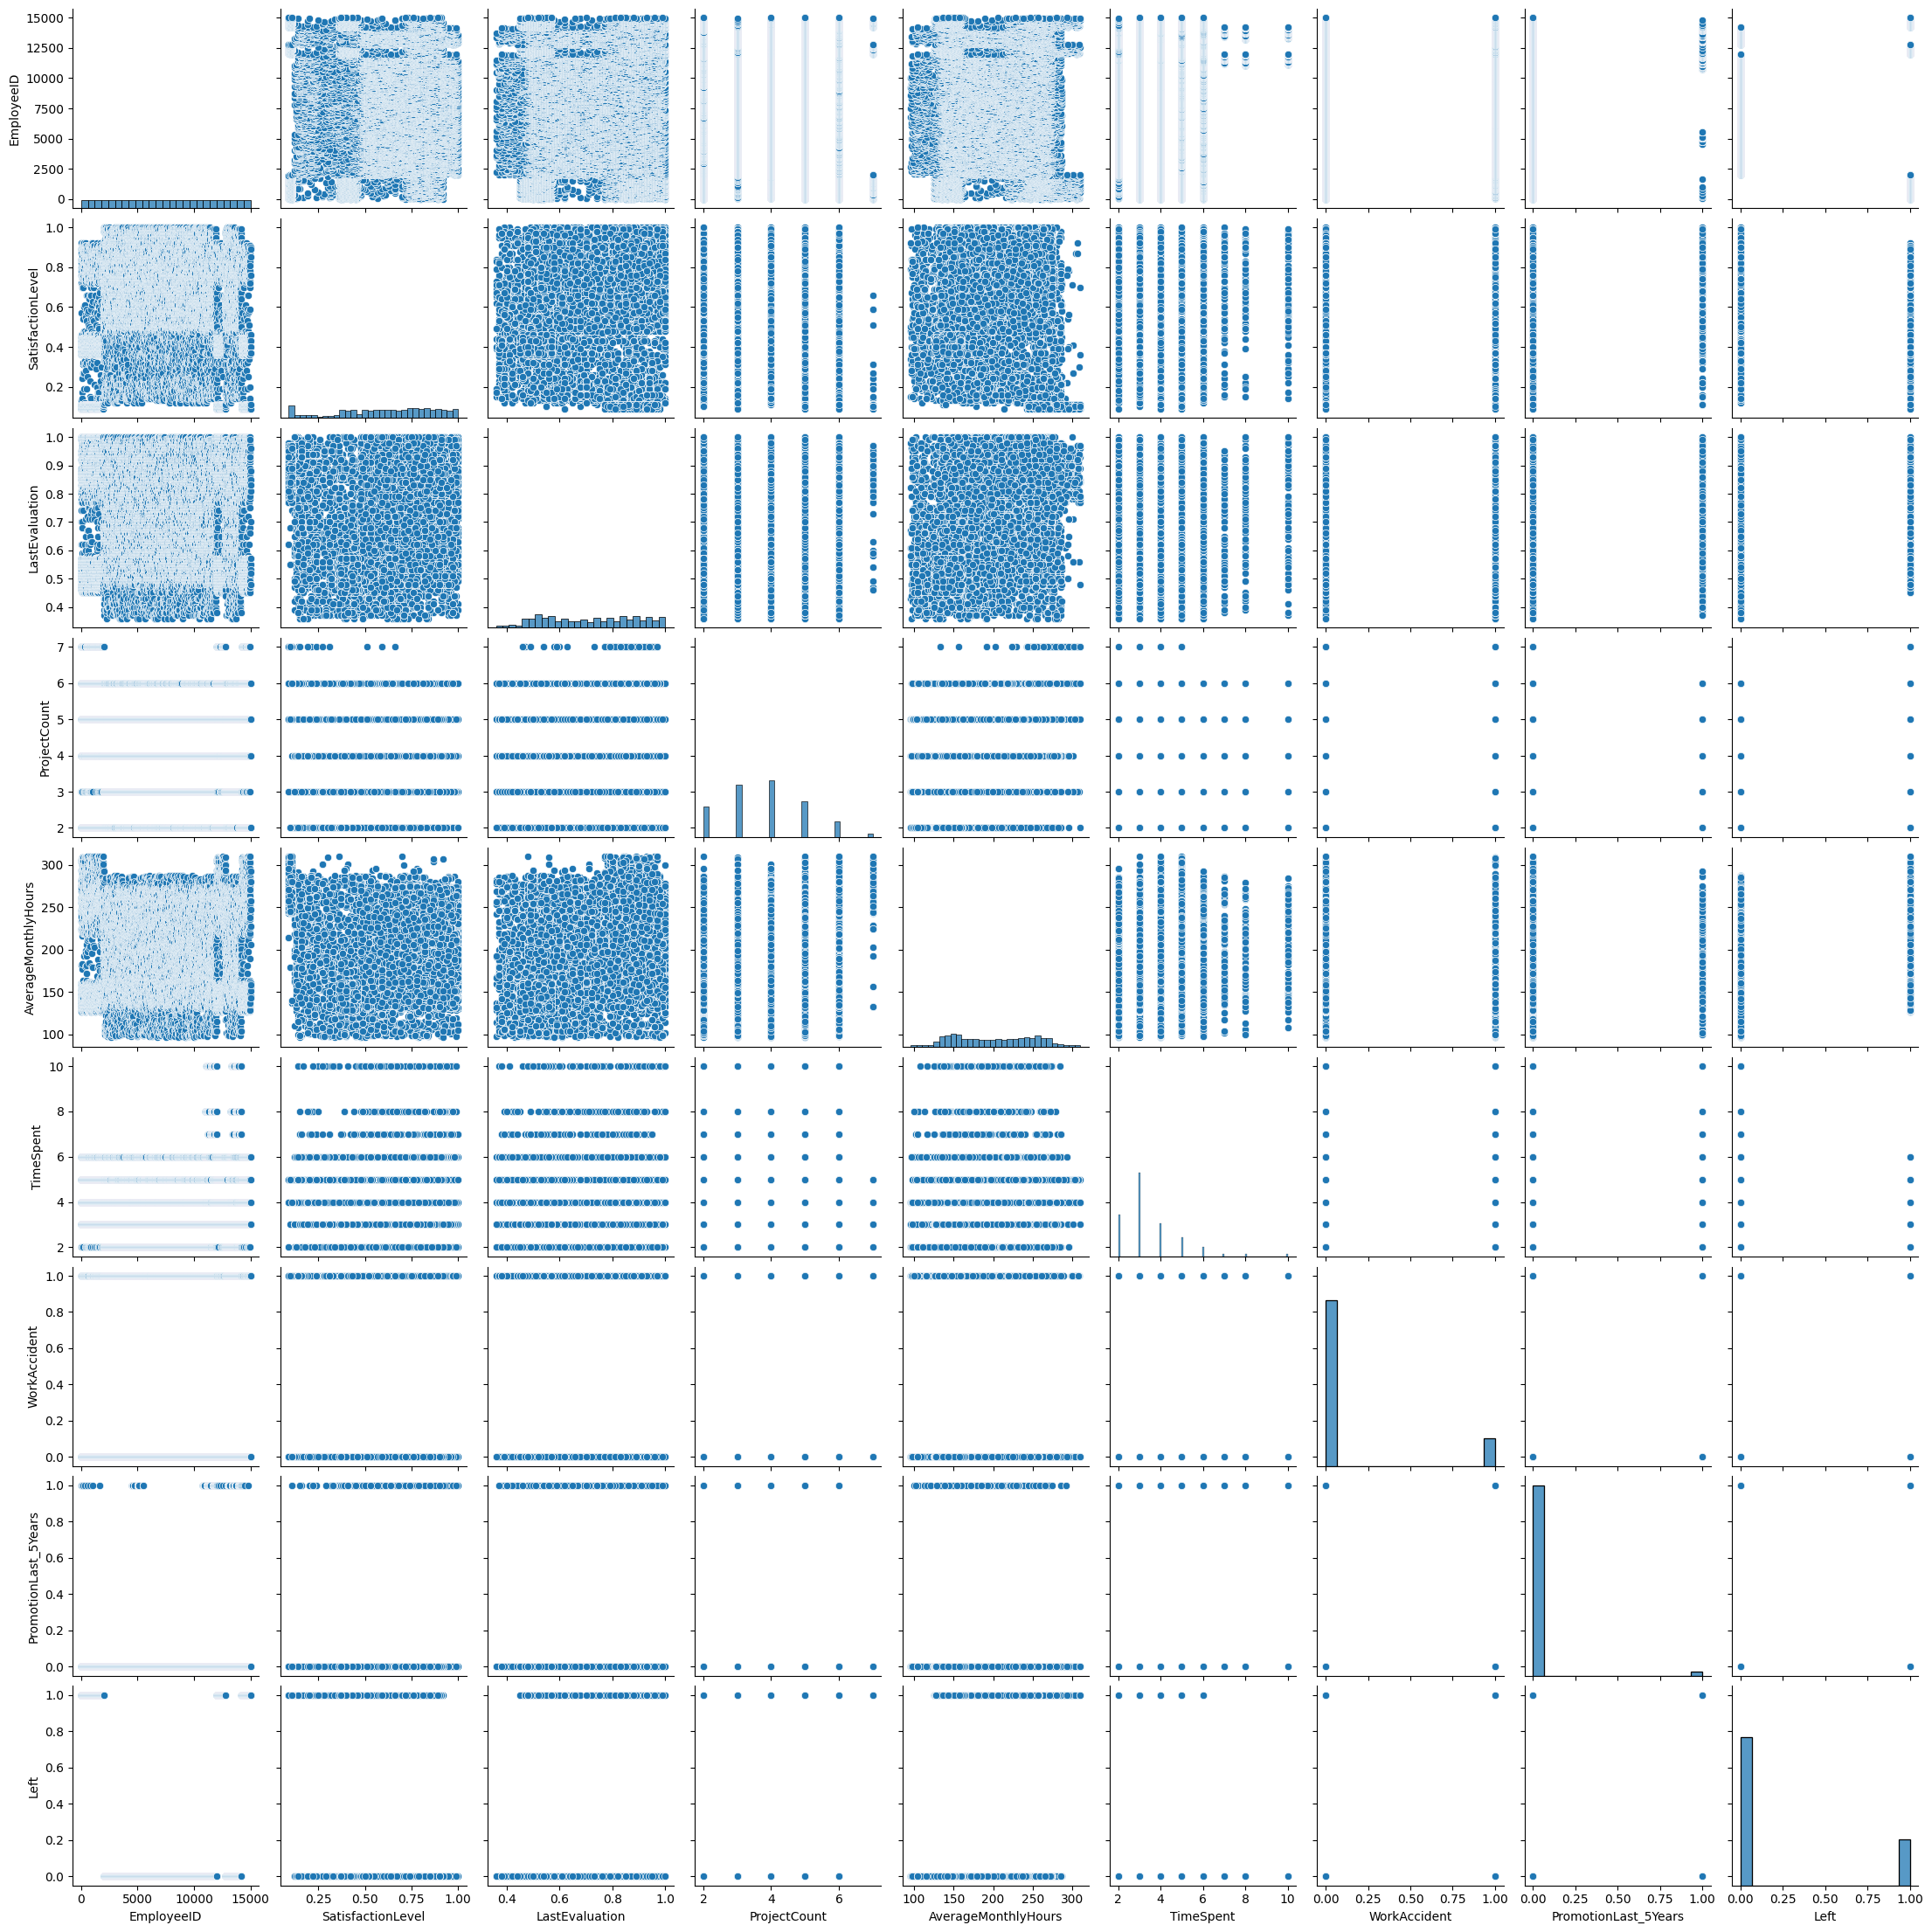

In [25]:
plt.figure(figsize=(10, 10))
sns.pairplot(data)

### ***Feature Engineering***

In [26]:
df = data.copy()
df.drop(['EmployeeID'], axis = 1, inplace = True)

In [27]:
# check for missing values
df.isnull().sum()

SatisfactionLevel       2
LastEvaluation          0
ProjectCount            0
AverageMonthlyHours     0
TimeSpent               0
WorkAccident            0
PromotionLast_5Years    0
Salary                  0
Left                    0
dtype: int64

In [28]:
df['SatisfactionLevel'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: SatisfactionLevel, dtype: float64

In [29]:
# filling missing values
df['SatisfactionLevel'].fillna(df['SatisfactionLevel'].mean(), inplace = True)
df.isnull().any()

SatisfactionLevel       False
LastEvaluation          False
ProjectCount            False
AverageMonthlyHours     False
TimeSpent               False
WorkAccident            False
PromotionLast_5Years    False
Salary                  False
Left                    False
dtype: bool

In [30]:
# unique values in a categorical column
df['Salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [31]:
# handling categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Salary']= label_encoder.fit_transform(df['Salary'])

df['Salary'].unique()

array([1, 2, 0])

*Encoded Values for 'Salary'*:

>*0 : High*

>*1 : Low*

>*2 : Medium*

In [32]:
# split the dataset into train and test set
X = df.drop(labels = 'Left', axis = 1)
y = df['Left']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11999, 8), (3000, 8), (11999,), (3000,))

### ***Model Selection***

In [35]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
# create model parameters
model_param = {
    'RandomForestClassifier': {
        'model':RandomForestClassifier(),
        'param': {
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier': {
        'model':XGBClassifier(objective='binary:logistic'),
        'param': {
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [37]:
scores = []
for model_name, mp in model_param.items():
    try:
        model_selection = GridSearchCV(estimator = mp['model'], param_grid = mp['param'], cv = 5, return_train_score = False)
        model_selection.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': model_selection.best_score_,
            'best_params': model_selection.best_params_
        })
        print(f"Results for {model_name}:")
        print(f"Best score: {model_selection.best_score_}")
        print(f"Best parameters: {model_selection.best_params_}")
    except Exception as e:
        print(f"Error occurred for model {model_name}: {e}")

print(scores)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Results for RandomForestClassifier:
Best score: 0.9251307546960097
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}
Results for XGBClassifier:
Best score: 0.9910661998443926
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
[{'model': 'RandomForestClassifier', 'best_score': 0.9251307546960097, 'best_params': {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}}, {'model': 'XGBClassifier', 'best_score': 0.9910661998443926, 'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}}]


In [38]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9251307546960097,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9910661998443926,
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}}]

### ***Model Building***

In [39]:
XGB_model = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.1, max_depth = 10, n_estimators = 200)

In [40]:
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
XGB_model.score(X_test, y_test)

0.989

In [42]:
# evaluating using test data

In [43]:
X_test[:1]

,SatisfactionLevel,LastEvaluation,ProjectCount,AverageMonthlyHours,TimeSpent,WorkAccident,PromotionLast_5Years,Salary
1670,0.44,0.57,2,141,3,0,0,2


In [44]:
XGB_model.predict(X_test[:1])

array([1])

In [45]:
data.loc[1670]

EmployeeID                1671
SatisfactionLevel         0.44
LastEvaluation            0.57
ProjectCount                 2
AverageMonthlyHours        141
TimeSpent                    3
WorkAccident                 0
PromotionLast_5Years         0
Salary                  medium
Left                         1
Name: 1670, dtype: object

> ***Correct Prediction***

In [46]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, XGB_model.predict(X_test))
cm

array([[2289,   10],
       [  23,  678]])

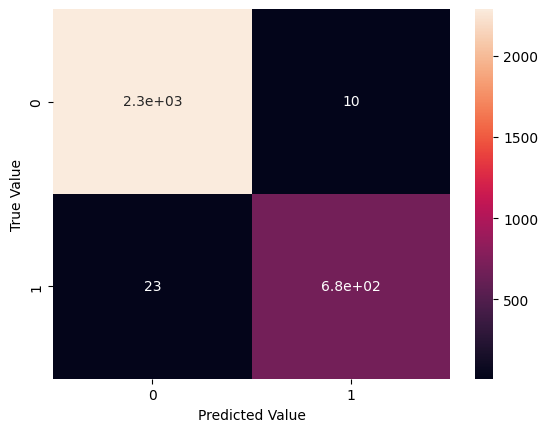

<Figure size 400x400 with 0 Axes>

In [47]:
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.figure(figsize=(4,4))
plt.show()

### ***Saving the Trained Model***

In [48]:
import pickle

filename = 'employee_attrition.sav'
pickle.dump(XGB_model, open(filename, 'wb'))

In [49]:
# loading the saved model
loaded_model = pickle.load(open('employee_attrition.sav', 'rb'))

In [50]:
input_data = (0.44, 0.57, 2, 141, 3, 0, 0, 2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[1]


In [51]:
for column in X.columns:
  print(column)

SatisfactionLevel
LastEvaluation
ProjectCount
AverageMonthlyHours
TimeSpent
WorkAccident
PromotionLast_5Years
Salary
